In [1]:
import random
import heapq
import datetime
import networkx as nx
import math
import argparse
import matplotlib.pyplot as plt
import time
import pickle
import numpy as np
import operator


In [9]:
file_address_5 = '../datasets/Flickr/flickrEdges.txt'
save_dir = '../datasets/Flickr/'

featureDic = {}
thetaDic = {}
PDic = {}
NodeDegree = {}

with open(file_address_5) as f:
    counter = 0
    for line in f:
        if counter >=4:
            data = line.split(' ')
            u = int(data[0])
            v = int(data[1])
            if u not in NodeDegree:
                NodeDegree[u] = 1
            else:
                NodeDegree[u]  +=1
            if v not in NodeDegree:
                NodeDegree[v] = 1
            else:
                NodeDegree[v]  +=1

        counter +=1
print('Finish Processing, Start dumping')
print('Total Nodes', len(NodeDegree))
print('maxDegree', max(iter(NodeDegree.items()), key=operator.itemgetter(1))[1], min(iter(NodeDegree.items()), key=operator.itemgetter(1))[1])
print('AverageDegree', sum(NodeDegree.values())/float(len(NodeDegree)))

FinalNodeList =[]
FinalNodeDegree  = {}
max_degree = 15
min_degree = 12

for key in NodeDegree:
    if NodeDegree[key] <= max_degree and NodeDegree[key] >= min_degree:
        FinalNodeList.append(key)
        FinalNodeDegree[key] = NodeDegree[key]

print('Total Nodes', len(FinalNodeList))
print('maxDegree', max(iter(FinalNodeDegree.items()), key=operator.itemgetter(1))[1], min(iter(FinalNodeDegree.items()), key=operator.itemgetter(1))[1])
print('AverageDegree', sum(FinalNodeDegree.values())/float(len(FinalNodeDegree)))


Finish Processing, Start dumping
Total Nodes 105938
maxDegree 5425 1
AverageDegree 43.74158470048519
Total Nodes 5261
maxDegree 15 12
AverageDegree 13.255844896407528


In [10]:
save_dir = '../datasets/Flickr/'
NodeList = FinalNodeList

NodeNum = len(NodeList)
print(NodeNum)
Small_NodeList = NodeList
NodeList = Small_NodeList
print(len(NodeList))


file_address = save_dir+'flickrEdges.txt'
start = time.time()
G = nx.DiGraph()
print('Start Reading')
with open(file_address) as f:
    #n, m = f.readline().split(',')
    for line in f:
        if line[0] != '#':
            u, v = list(map(int, line.split(' ')))
            if u in NodeList and v in NodeList:
                try:
                    G[u][v]['weight'] += 1
                except:
                    G.add_edge(u,v, weight=1)
                try:
                    G[v][u]['weight'] += 1
                except:
                    G.add_edge(v, u, weight=1)
print('Start Dumping')
print(len(G.nodes()), len(G.edges()))

5261
5261
Start Reading
Start Dumping
2841 4308


In [ ]:
2414  13810

In [33]:
pickle.dump(NodeList+NodeList2, open(save_dir+'NodeListUnion.list', "wb" ))

In [34]:
pickle.dump(G_Union, open(save_dir+'G_Union.G', "wb" ))

In [38]:
NodeListUnion = NodeList+NodeList2

In [13]:
G2 = pickle.load(open(save_dir+'SubG50-100.G', 'rb'))
NodeList2 = pickle.load(open(save_dir+'NodeList50-100.list', 'rb'))

In [26]:
count = 0
with open(file_address) as f:
    #n, m = f.readline().split(',')
    for line in f:
        if line[0] != '#':
            u, v = list(map(int, line.split(' ')))
            if (u in NodeList and v in NodeList2) or (u in NodeList2 and v in NodeList):
                if random.random() <= 0.05:
                    G_Union.add_edge(u,v, weight=1)
                    G_Union.add_edge(v,u, weight=1)
                    count += 1
print(count)

213


In [17]:
G_Union = nx.compose(G, G2)

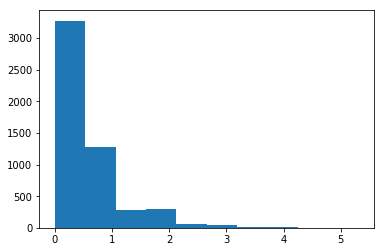

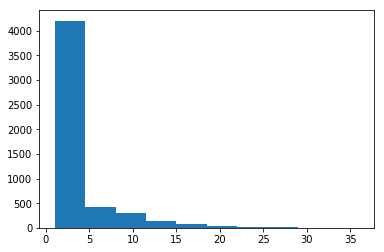

In [42]:
save_dir = '../datasets/Flickr/'
def featureUniform(dimension, scale):
    vector = np.array([random.random() for i in range(dimension)])
    l2_norm = np.linalg.norm(vector, ord =2)

    vector = vector/l2_norm

    gau = np.random.normal(0.5, 0.5, 1)[0]
    while gau < 0 or gau > 1:
        gau = np.random.normal(0.5, 0.5, 1)[0]

    vector = vector / scale * gau * 1

    return vector

dimension = 4
nodeDic = {}
edgeDic = {}
soft_degree = []
hard_degree = []
G = pickle.load(open(save_dir+'G_Union.G', 'rb'))
for u in G.nodes():
    if u in NodeList:
        nodeDic[u] = [featureUniform(dimension, 1), featureUniform(dimension, 1)]
    elif u in NodeList2:
        nodeDic[u] = [featureUniform(dimension, 50), featureUniform(dimension, 1)]
    else:
        print('error')
for u in G.nodes():
    hd = 0
    sd = 0
    for v in G[u]:
        prob = np.dot(nodeDic[u][1], nodeDic[v][0]) * 4
        if prob > 1:
            prob = 1
        edgeDic[(u,v)] = prob
        sd += prob
        hd += 1
    soft_degree.append(sd)
    hard_degree.append(hd)
plt.hist(soft_degree)
plt.show()
plt.hist(hard_degree)
plt.show()

# pickle.dump(nodeDic, open(save_dir+'Small_nodeFeatures.dic', "wb" ))
# pickle.dump(edgeDic, open(save_dir+'Probability.dic', "wb" ))


In [43]:
pickle.dump(nodeDic, open(save_dir+'Small_nodeFeatures.dic', "wb" ))
pickle.dump(edgeDic, open(save_dir+'Probability.dic', "wb" ))

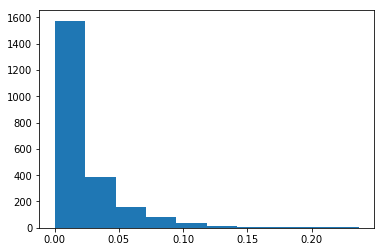

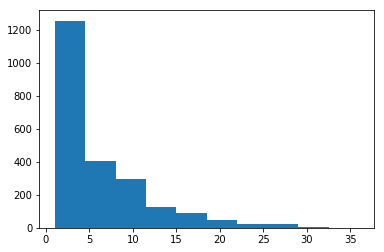

In [37]:
save_dir = '../datasets/Flickr/'
def featureUniform(dimension, scale):
    vector = np.array([random.random() for i in range(dimension)])
    l2_norm = np.linalg.norm(vector, ord =2)

    vector = vector/l2_norm

    gau = np.random.normal(0.5, 0.5, 1)[0]
    while gau < 0 or gau > 1:
        gau = np.random.normal(0.5, 0.5, 1)[0]

    vector = vector / scale * gau * 1

    return vector

dimension = 4
nodeDic = {}
edgeDic = {}
soft_degree = []
hard_degree = []
G = pickle.load(open(save_dir+'SubG50-100.G', 'rb'))
for u in G.nodes():
    nodeDic[u] = [featureUniform(dimension, 50), featureUniform(dimension, 1)]
for u in G.nodes():
    hd = 0
    sd = 0
    for v in G[u]:
        prob = np.dot(nodeDic[u][1], nodeDic[v][0]) * 1
        if prob > 1:
            prob = 1
        edgeDic[(u,v)] = prob
        sd += prob
        hd += 1
    soft_degree.append(sd)
    hard_degree.append(hd)
plt.hist(soft_degree)
plt.show()
plt.hist(hard_degree)
plt.show()

# pickle.dump(nodeDic, open(save_dir+'Small_nodeFeatures.dic', "wb" ))
# pickle.dump(edgeDic, open(save_dir+'Probability.dic', "wb" ))
